# Model

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df_clean = pd.read_csv("data/df_norm.csv")

In [3]:
df_clean 

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN,outlier
0,2072,1.565728,3.604682,1.791759,7.524561,6.159095,7.242082,6.033086,0.393190,11.184421,0,1,0,0,0,0
1,10600,1.562134,3.516904,2.079442,7.616776,5.855072,6.759255,5.828946,1.933447,12.521248,1,0,0,0,0,0
2,2494,1.566337,3.600048,3.218876,6.774224,5.365976,6.836259,5.365976,0.440575,10.973357,0,1,0,0,0,0
3,4284,1.563057,3.529297,3.433987,6.432940,5.433722,6.391917,5.424950,0.424221,12.206073,1,0,0,0,0,0
4,16541,1.568134,3.632045,3.044522,7.561122,5.921578,7.029973,5.918894,1.406465,11.677592,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,1.569283,3.678577,2.995732,7.289611,5.627621,6.613384,5.521461,1.119232,11.448920,0,1,0,0,0,0
16508,18898,1.569879,3.640477,3.891820,7.768533,6.222576,7.030857,6.126869,0.960614,11.543455,0,0,0,1,0,1
16509,11798,1.568117,3.661508,2.944439,7.836370,6.133398,7.095064,6.061457,1.503144,12.168371,0,1,0,0,0,0
16510,6637,1.562738,3.531055,3.663562,7.928766,6.733402,7.842279,6.650279,0.945850,11.941456,1,0,0,0,0,0


In [4]:
df_sample = df_clean.sample(n = 7000, random_state = 1)

In [5]:
df_sp = df_sample.drop(["index", "latitude", "longitude"], axis = 1)

In [6]:
df_sp

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN,outlier
11418,3.091042,8.350430,6.436150,7.786552,6.492240,1.895203,12.559894,1,0,0,0,0,0
6821,3.332205,8.114325,6.533789,7.700748,6.472346,1.241153,12.219976,1,0,0,0,0,0
9138,2.708050,7.687539,5.888878,6.963190,5.703782,1.531476,11.679287,0,1,0,0,0,0
4175,2.708050,7.707962,6.042633,6.911747,6.033086,1.024894,11.676744,0,1,0,0,0,0
15220,1.945910,7.927685,6.272877,7.225481,6.224558,0.963709,11.550221,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,3.951244,7.352441,6.111467,6.551080,6.037871,0.921278,12.509136,0,0,0,1,0,1
10093,3.091042,8.812695,6.973543,7.952615,6.901737,1.812624,12.469590,1,0,0,0,0,1
1652,2.639057,8.714403,7.198931,7.587817,7.129298,1.031796,12.102377,1,0,0,0,0,1
4965,2.944439,8.068403,6.416732,7.183112,6.386879,1.417066,12.495378,0,0,0,1,0,1


## define predictor and outcomes variables 

In [7]:
X = df_sp.drop(["median_house_value"], axis = 1)
y = df_sp["median_house_value"]

## Create linear regression baseline model

In [8]:
import statsmodels.api as sm

X = sm.add_constant(X)

Cross_val_score 

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object
reg = LinearRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(reg, X, y, cv=5)

# Print the mean and standard deviation of the scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.68 (+/- 0.02)


In [10]:
# Train test split 
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Linear regression model

model = sm.OLS(train_y, train_X)
model = model.fit()
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS                Adj. R-squared:     0.679    
Dependent Variable: median_house_value AIC:                3222.0847
Date:               2023-02-01 15:22   BIC:                3301.6509
No. Observations:   5600               Log-Likelihood:     -1599.0  
Df Model:           11                 F-statistic:        1077.    
Df Residuals:       5588               Prob (F-statistic): 0.00     
R-squared:          0.679              Scale:              0.10387  
--------------------------------------------------------------------
                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                9.8732   0.0691 142.8669 0.0000  9.7377 10.0087
housing_median_age   0.0633   0.0085   7.4736 0.0000  0.0467  0.0800
total_rooms         -0.2223   0.0271  -8.2130 0.0000 -0.2754 -0.1693
total_bedrooms       0.1955   0.0333   5.8621 0.0000 

Info : 

- no.observation is 10547 (80% of the overall dataset)
- R-squared (goodness of the model from 0 to 1) is 0.631
- p-value >0.05 for some predictors: meaning that we would consider removing these variables from the predictors list! It is because p-values determine whether the relationships that we observe in this sample also exist in the larger population.

### Predict on test set

We will use model.predict on the test_X and compare the predictions with the actual test_y values.

In [11]:
predictions = model.predict(test_X)

df_results = pd.DataFrame({'Actual': test_y, 'Predicted': predictions})

In [12]:
df_results

,Actual,Predicted
2590,12.031719,11.989234
15050,12.474190,12.546709
14865,12.720093,12.398412
13333,11.949889,11.857045
14519,11.016988,11.546137
...,...,...
2463,12.399581,12.501368
15023,11.463735,11.861324
6164,12.396280,12.552287
2943,12.299563,11.911731


### Evaluate the model 

Let's find RMSE and R2 

In [13]:
from sklearn.metrics import r2_score, mean_squared_error

RMSE = np.sqrt(mean_squared_error(test_y, predictions))
r2 = r2_score(test_y, predictions)
print('RMSE:', RMSE, 'R2 :',r2)

RMSE: 0.31122364783042056 R2 : 0.6957805660164156


## RANSAC regression model 

In [14]:
X = df_sp.drop(["median_house_value"], axis = 1)
y = df_sp["median_house_value"]

In [15]:
from sklearn.linear_model import RANSACRegressor

In [16]:
# Train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [17]:
# Set RANSAC hyperparameters
ransac = RANSACRegressor(LinearRegression(),
max_trials=10, # Number of Iterations
min_samples=2000, # Minimum size of the sample
loss='absolute_loss', # Metrics for loss
residual_threshold=10 # Threshold
)

# Train model
ransac.fit(X_train, y_train)

# Model prediction
y_pred = ransac.predict(X_test)

# Evaluate the model 
print('RMSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

RMSE: 0.09686015896887348
R²: 0.695780566016416


/home/selmane/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_ransac.py:369: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(


I see that my RMSE decrease well with the RANSAC regression model

## Model assumptions

Before we built a linear regression model, we make the following assumptions:

- Linearity: The relationship between X and the mean of Y is linear.
- Normality: The residuals follow a normal distribution and the expected mean of the residuals is zero.
- Homoscedasticity: The variance of residual is constant for all values of X.
- No autocorrelation: Residuals are independent of each other.
- No multicollinearity: There is no high correlation between predictor variables.

### Linearity

We will test linearity with a scatter plot to see predicted values versus the actual values. Ideally, the data points should lie around the diagonal line on the plot.

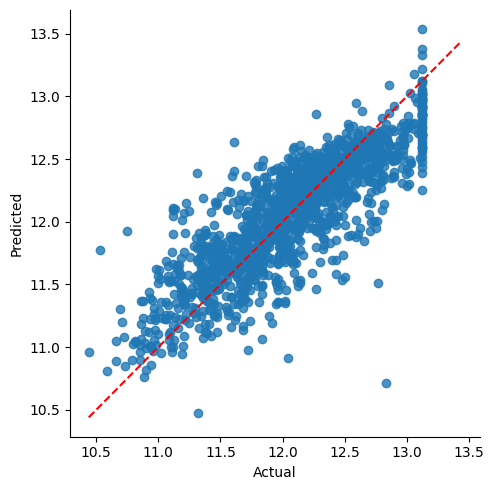

In [18]:
# Plot the actual vs predicted results
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

# Plot the diagonal line 
d_line= np.arange(df_results.min().min(), df_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.show()

In my dataset, i can see that there is not a perfect relashionship. On the lower values our predictions are biased 

### Normality

We will test normality by checking with the quantile-quantile plot, Q-Q plot.

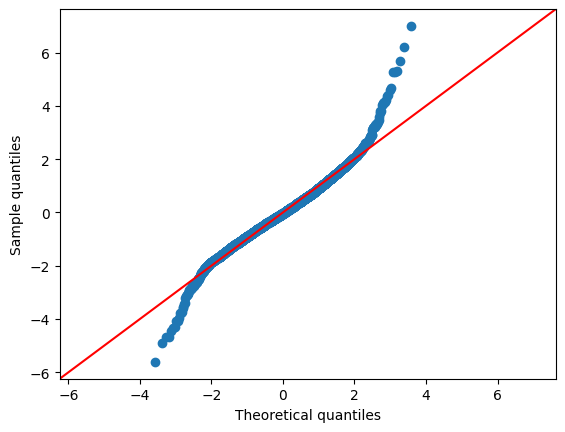

In [19]:
from statsmodels.graphics.gofplots import qqplot 

fig = qqplot(model.resid_pearson, line = '45', fit = 'True')
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

We can see that our model biasing

### Homoscedasticity

We will test homoscedasticity by plotting the residuals and checking if the variance is uniform.

/home/selmane/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


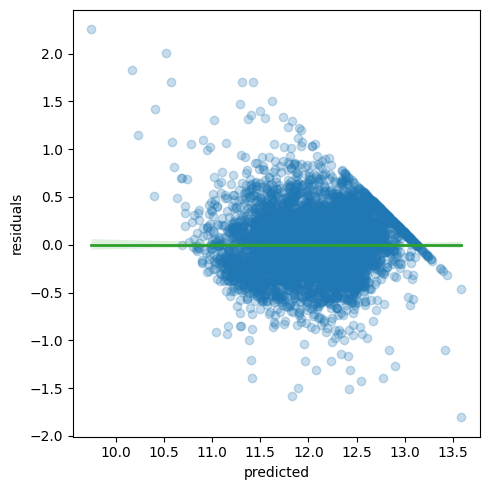

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(model.fittedvalues,model.resid, scatter_kws={'alpha': 0.25}, line_kws={'color': 'C2', 'lw': 2}, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('residuals')
plt.tight_layout()
plt.show()

We can say that the distribution of our residuals is not completely uniform.

### No Autocorrelation

We will perform the Durbin-Watson test to determine if the no autocorrelation assumption holds.

In [21]:
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(model.resid)
print("Durbin-Watson:", durbinWatson)

Durbin-Watson: 1.998477067383374


The Durbin-Watson statistic ranges between 0 and 4 : 
- A value of 2.0 means that there is no autocorrelation. 
- Values between 0 and 2 indicate positive 
- values between 2 and 4 indicate negative autocorrelation. 

In our case, Durbin-Watson statistic is very close to 2.0 therefore we can say that no autocorrelation assumption is not violated.

### No Multicolinearity

We will plot a heatmap to see the correlation between predictors visually and we will also calculate the variance inflation factor (VIF), which measures the multicollinearity among the independent variables.

In [22]:
mask = np.zeros_like(train_X.drop("const", axis=1).corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train_X.drop("const", axis=1).corr().round(2), annot=True, mask=mask, cmap="cividis")

<AxesSubplot:>

And we calculate VIF:

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
for i in range(len(X.columns)):
    v=vif(np.matrix(X),i)
    print("Variance inflation factor for {}: {}".format(X.columns[i],round(v,2)))

Variance inflation factor for housing_median_age: 1.27
Variance inflation factor for total_rooms: 23.11
Variance inflation factor for total_bedrooms: 33.06
Variance inflation factor for population: 8.33
Variance inflation factor for households: 31.0
Variance inflation factor for median_income: 2.54
Variance inflation factor for _<1H OCEAN: 116.85
Variance inflation factor for _INLAND: 85.22
Variance inflation factor for _ISLAND: 1.08
Variance inflation factor for _NEAR BAY: 30.46
Variance inflation factor for _NEAR OCEAN: 34.64
Variance inflation factor for outlier: 3.06


Info : 
- A VIF of 1 indicates two variables are not correlated
- A VIF between 1 and 5 indicates a moderate correlation 
- And a VIF above 5 indicates a high correlation.

As result shows we have 5 high correlated and 2 moderately correlated variables. It is better if we get rid of some of them.

### BONUS: Outliers

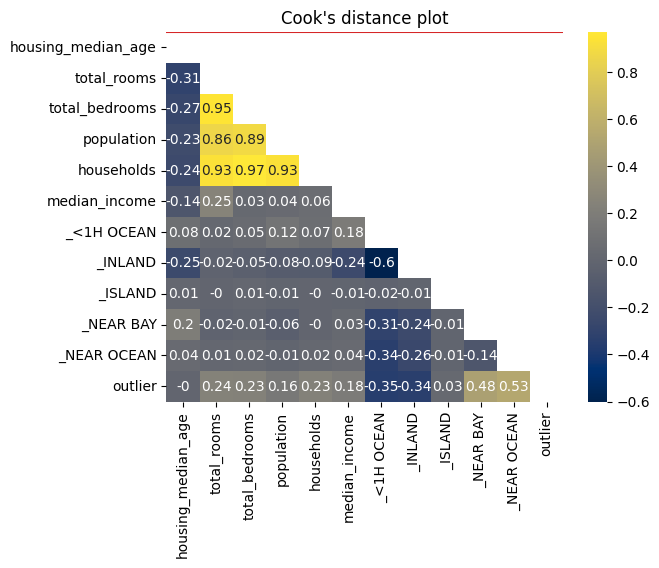

In [24]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence

inf=influence(model)
(i, d) = inf.cooks_distance
plt.title("Cook's distance plot")
plt.stem(np.arange(len(i)), i, markerfmt=",")
plt.show()

From Cook’s plot, we can understand which are the observations we need to pay more attention to and decide whether to drop them or not. (As a rule, the observation has a high influence if the Cook’s distance is greater than 4/N-k-1 ( N=number of observations, k= number of predictors, yellow horizontal line in the plot)

### BONUS: Influence plot

Influence plots show the studentized residuals versus the leverage of each observation as measured by the hat matrix.

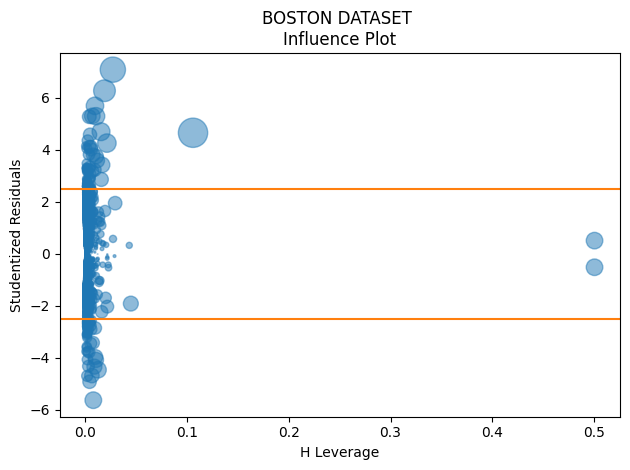

In [25]:
from statsmodels.stats.outliers_influence import OLSInfluence 
influence = OLSInfluence(model)
fig, ax = plt.subplots()
ax.axhline(-2.5, linestyle='-', color='C1')
ax.axhline(2.5, linestyle='-', color='C1')
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal, 
 s=1000 * np.sqrt(influence.cooks_distance[0]),
 alpha=0.5)
ax.set_xlabel('H Leverage')
ax.set_ylabel('Studentized Residuals')
ax.set_title("BOSTON DATASET \nInfluence Plot")
plt.tight_layout()
plt.show()

In the dataset we can see that some data points have low leverage but large or low residuals. These highly influential data points need a delicate evaluation before including in the model.